In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [19]:
n_classes = 10
input_shape = (28, 28, 1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print('Dataset:')
print('Train data:', x_train.shape)
print(' Test data:', x_test.shape)

Dataset:
Train data: (60000, 28, 28, 1)
 Test data: (10000, 28, 28, 1)


In [11]:
model = Sequential(name='mnist_classifier_model')
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "mnist_classifier_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)     

In [12]:
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 24s 107ms/step - loss: 2.2701 - accuracy: 0.1470 - val_loss: 2.0467 - val_accuracy: 0.4943
Epoch 2/20
211/211 [==============================] - 19s 92ms/step - loss: 1.6815 - accuracy: 0.6062 - val_loss: 0.5081 - val_accuracy: 0.8782
Epoch 3/20
211/211 [==============================] - 19s 92ms/step - loss: 0.5133 - accuracy: 0.8533 - val_loss: 0.3148 - val_accuracy: 0.9120
Epoch 4/20
211/211 [==============================] - 20s 93ms/step - loss: 0.3638 - accuracy: 0.8916 - val_loss: 0.2681 - val_accuracy: 0.9238
Epoch 5/20
211/211 [==============================] - 20s 93ms/step - loss: 0.3021 - accuracy: 0.9094 - val_loss: 0.2171 - val_accuracy: 0.9402
Epoch 6/20
211/211 [==============================] - 20s 94ms/step - loss: 0.2648 - accuracy: 0.9204 - val_loss: 0.1933 - val_accuracy: 0.9447
Epoch 7/20
211/211 [==============================] - 20s 93ms/step - loss: 0.2381 - accuracy: 0.9288 - val_loss: 0.1825 - val_accuracy

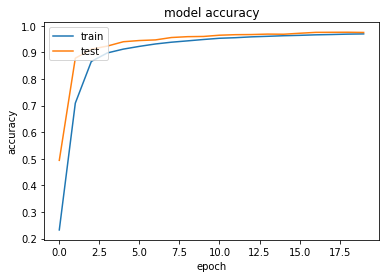

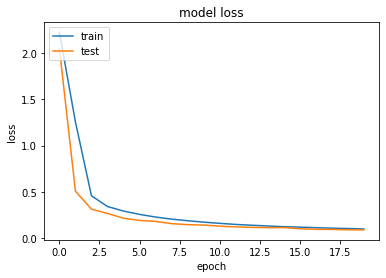

In [13]:
# Graficas del proceso de entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.08915100991725922
Test accuracy: 0.9742000102996826
